<centerline> 
![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)
</centerline>

<h2 align='center'>Sports Analytics in the Classroom</h2>

<h4 align='center'>Tina Leard (Cybera) </h4>

<h4 align='center'>Michael Lamoureux (University of Calgary) </h4>

October 2020.

This is a slideshow in Jupyter notebook format.

To start, click on the "Run All" arrows above, or select the "Kernel" menu item and choose "Restart & run all." Say yes to the confirmation.

To get to slideshow mode, click on the icon in the menu bar that looks like a bar chart, as shown here. 
<img src="images/slideshow_icon.png"
     alt="Slideshow icon"
     width=200 />
     
You can advance the slide show using the arrow keys. Exit by clicking on that big "X" in the top left corner of the slide show. 

Note the slide show is still a live Jupyter notebook, so you can run the code and edit while in the slide show. 

In [1]:
!pip install ipysheet --user

In [2]:
!jupyter nbextension enable --py --sys-prefix --user ipysheet

Enabling notebook extension ipysheet/extension...
      - Validating: OK


In [3]:
from ipysheet import sheet, cell, cell_range

#import plotly.graph_objects as go
#import cufflinks as cf
#cf.go_offline()
#import pandas as pd
#import numpy as np
#%matplotlib inline


## Outline for Analytics in the Classroom

- focus on data visualization
- use sports as a good source of interesting data
- use modern tools: Python, Jupyter notebooks

## A Field Hockey Pitch

<img src="images/field_hockey_pitch_h_0.png"
     alt="Field Hockey Pitch"
     width=800 />

## Circle Zones in Goal Area

A background for visualization

<img src="images/field_hockey_circle_zones.png"
     alt="Field Hockey Circle Zones"
     width=800 />

## A Quidditch Pitch (for my son)

<img src="images/quidditch_pitch.png"
     alt="Quidditch Pitch"
     width=800 />

In [7]:
spread_sheet = sheet()
cell(1,1, "It's Alive!");

## Using Spreadsheets, Live

In [8]:
spread_sheet

Sheet(cells=(Cell(column_end=1, column_start=1, row_end=1, row_start=1, type='text', value="It's Alive!"),), c…

In [7]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
# We set up a spreadsheet, and a figure, that will be linked together.

# set these for number of lanes, number of zones
nLanes = 3
nZones = 4

# We need a list of Lanes and Zones. Could be long.
LaneList = ['Lane 1','Lane 2','Lane 3','Lane 4','Lane 5','Lane 6','Lane 7','Lane 8']
ZoneList = ['Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6','Zone 7','Zone 8']

# here is the spreadsheet, using ipysheets function

spread_sheet_1 = sheet(rows=nLanes, columns=nZones, \
                       column_headers=ZoneList[0:nZones], \
                       row_headers = LaneList[nLanes-1::-1])
my_cells = cell_range([[1,1,1,3],[2,2,1,3],[3,3,1,3]],row_start=0,col_start=0,numeric_format="int")


figure_1 = go.Figure(data=go.Heatmap(
          y = LaneList[0:nLanes],
          x = ZoneList[0:nZones],
          z =list(reversed(my_cells.value)),
          type = 'heatmap',
          colorscale = 'peach',opacity = 1.0))

axis_template = dict(range = [0,5], autorange = True,
             showgrid = False, zeroline = True,
             linecolor = 'black', showticklabels = True,
             ticks = 'outside' )

figure_1.update_layout(margin = dict(t=50,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 906, height = 556, title="Field Hockey Zones and Lanes",
    autosize = True )

# Add image in the background
figure_1.add_layout_image(
        dict(
            source="images/field_hockey_pitch_h_0.png",
            xref="x",
            yref="y",
            x=-0.5,
            y=-.5 + nLanes,  #this adjusts the placement of the field image
            sizex=nZones,
            sizey=nLanes,
            sizing="fill",
            opacity=0.7,
            layer="above")
)

# changes in my_cells should trigger this function
def calculate(change):
    figure_1.update_traces(z=list(reversed(my_cells.value)))
    
my_cells.observe(calculate, 'value')

figure_1.show()  # use this for debugging only

In [9]:
spread_sheet_1  # Enter data in this spreadsheet

Sheet(cells=(Cell(column_end=3, column_start=0, numeric_format='int', row_end=2, row_start=0, squeeze_column=F…

In [15]:
figure_1.update() # Click the keys "Shift-return" to update the figure

In [11]:
# REDO THIS IN THE VERTICAL MODE

# set these for number of lanes, number of zones
nLanes = 5
nZones = 4

# We need a list of Lanes and Zones. Could be long.
LaneList = ['Lane 1','Lane 2','Lane 3','Lane 4','Lane 5','Lane 6','Lane 7','Lane 8']
ZoneList = ['Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6','Zone 7','Zone 8']

# here is the spreadsheet, using ipysheets function

spread_sheet_2 = sheet(rows=nZones, columns=nLanes, \
                       column_headers=LaneList[0:nLanes], \
                       row_headers = ZoneList[nZones-1::-1])
my_cells_2 = cell_range([[1,1,1,3,1],[2,2,1,3,1],[3,3,1,3,1],[1,2,1,2,3]],row_start=0,col_start=0,numeric_format="int")


figure_2 = go.Figure(data=go.Heatmap(
          y = ZoneList[0:nZones],
          x = LaneList[0:nLanes],
          z = my_cells_2.value,
          type = 'heatmap',
          colorscale = 'peach',opacity = 1.0))

axis_template = dict(range = [0,5], autorange = True,
             showgrid = False, zeroline = True,
             linecolor = 'black', showticklabels = True,
             ticks = 'outside' )

figure_2.update_layout(margin = dict(t=0,r=0,b=0,l=250),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 600, height = 500, title="Field Hockey Zones and Lanes",
    autosize = True )

# Add image in the background
figure_2.add_layout_image(
        dict(
            source="images/field_hockey_pitch.png",
            xref="x",
            yref="y",
            x=-0.5,
            y=-0.5 +nZones,  #this adjusts the placement of the field image
            sizex=5,
            sizey=4,
            sizing="fill",
            opacity=0.7,
            layer="above")
)

# changes in my_cells should trigger this function
def calculate_2(change):
    figure_2.update_traces(z=my_cells_2.value)
    
my_cells_2.observe(calculate_2, 'value')

figure_2.show()  # use this for debugging only

In [12]:
spread_sheet_2  # Enter data in this spreadsheet

Sheet(cells=(Cell(column_start=0, numeric_format='int', row_start=0, squeeze_column=False, squeeze_row=False, …

In [14]:
figure_2.update() # Click the keys "Shift-return" to update the figure

## Visual Analytics

- Video recording of an entire game, analyzed for events
- record times, position of players, actions such as passes and shots on goal
- saved in a large spread sheet, 30+ Megs of data

We use an example of a soccer game

In [13]:
df1 = pd.read_csv('data/Sample_Game_1_RawEventsData.csv'); df1  ## Sample game data set

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


### A first attempt to visualize the data (not informative)

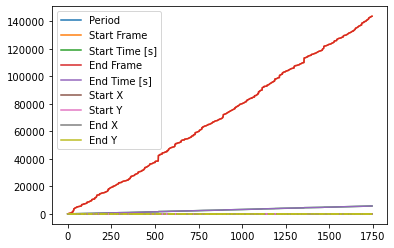

In [14]:
df1.plot();  # Naive attempt to plot the data (not informative)

### A better visualization: locate events on the field

In [15]:
df1.iplot(kind="scatter",x = "Start X", y = "Start Y", mode = "markers")

### Beginning analysis: location of passes by "Away" team, first period

In [16]:
df1.loc[lambda df: (df['Team'] == 'Away') & (df['Period'] == 1) & (df['Type'] == 'PASS'), :] \
   .iplot(kind="scatter",x = "Start X", y = "Start Y", mode = "markers")

### Compare with location of passes by "Home" team, first period

In [17]:
df1.loc[lambda df: (df['Team'] == 'Home') & (df['Period'] == 1) & (df['Type'] == 'PASS'), :] \
   .iplot(kind="scatter",x = "Start X", y = "Start Y", mode = "markers")

### Location of "Ball OuT" by "Away" team, first period

In [18]:
df1.loc[lambda df: (df['Team'] == 'Away') & (df['Period'] == 1) & (df['Type'] == 'BALL OUT'), :] \
   .iplot(kind="scatter",x = "Start X", y = "Start Y", mode = "markers")

### Compare with location of "Ball Out" by "Away" team, first period

In [19]:
df1.loc[lambda df: (df['Team'] == 'Home') & (df['Period'] == 1) & (df['Type'] == 'BALL OUT'), :] \
   .iplot(kind="scatter",x = "Start X", y = "Start Y", mode = "markers")

## Other analyses we can easily do with this data

- Compare performance of "Home" team to the "Away" team
- Compare first period to second period (number of passes, number of interceptions, shots on goal)
- Compare individual players (number of passes, number of shots on goal)


# Workshop -- add a section here on how to use the tools

## Notes on the technology

- Created on the **Callysto.ca** technology (all free, all open source)
- Using Jupyter notebooks to put all the pieces together, including the slideshow
- Python for the programming language
- Software libraries include:
    - Pandas for data analysis
    - Ipysheet for spread sheets
    - Plotly and Cufflinks for graphics
    - Numpy for numerical routines

## Getting started

- Read about the Callysto resources at https://callysto.ca
- Take an online course at https://courses.callysto.ca/
- log into the Jupyter Hub at https://hub.callysto.ca


## Some basic Python



## Using Pandas

## Plotly and Cufflinks

![hey](callysto.png)